In [1]:
import pandas as pd

In [2]:
path = "NFLX.csv"

In [3]:
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
df = df[df['Close'] != 0] 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

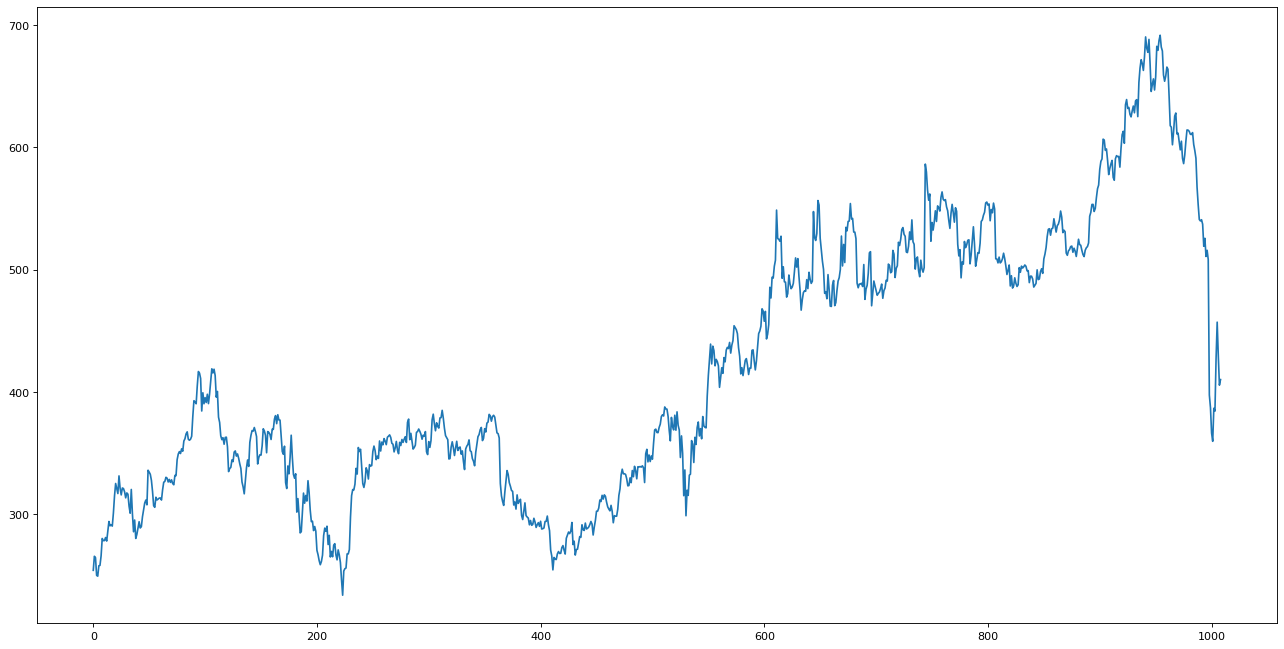

In [6]:
figure(figsize=(20,10),dpi=80)
time_x = df.index
time_y = df['Close']
plt.plot(time_x,time_y)
plt.show()

In [7]:
# ! pip install EMD-signal

In [8]:
Signal = df['Close'].to_numpy()
T = df.index.to_numpy()
from PyEMD import EMD
emd = EMD()
IMFs = emd(Signal)
nIMFs = len(IMFs)

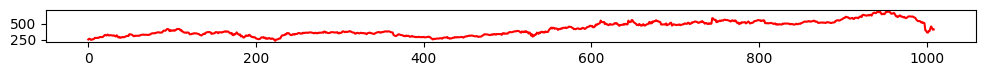

In [9]:
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+10, 1, 1)
plt.plot(T, Signal, 'r')

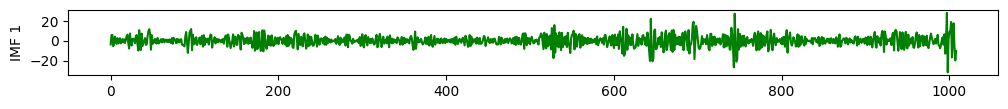

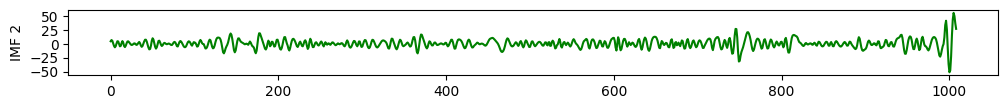

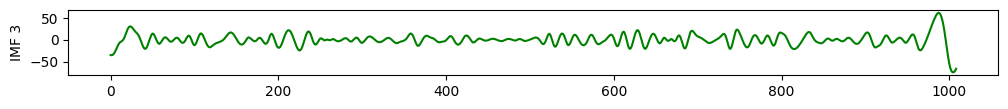

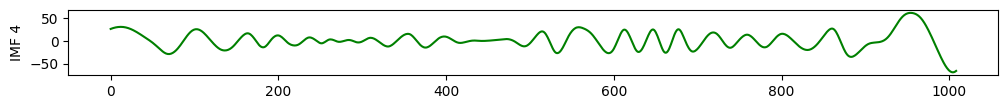

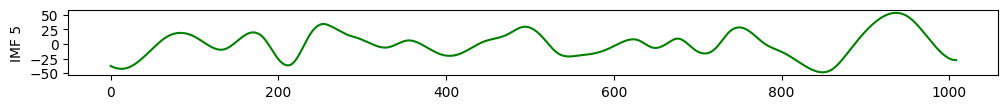

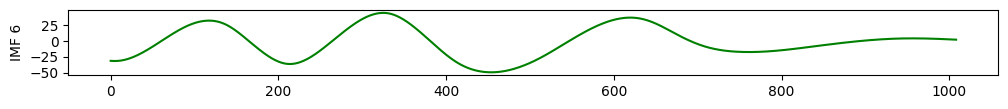

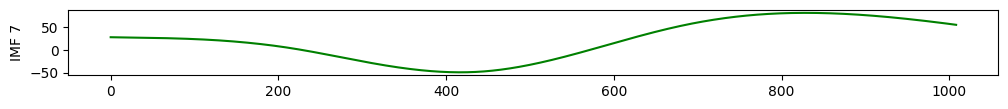

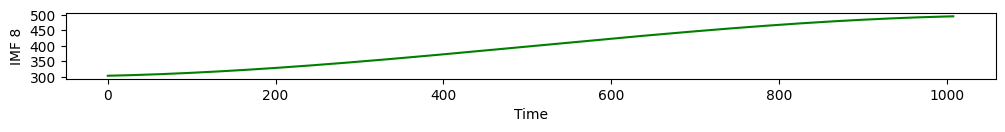

In [10]:
for n in range(nIMFs):
  plt.figure(figsize=(12,9))
  plt.subplot(nIMFs+1, 1,2)
  plt.plot(T, IMFs[n], 'g')
  plt.ylabel("IMF %i" %(n+1))
  plt.locator_params(axis='y', nbins=5)


plt.xlabel("Time")
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
def perform_LSTM(dataset, look_back, layer=4):
  
  dataset = dataset.astype('float32')
  dataset = np.reshape(dataset, (-1, 1))
  
  scaler = MinMaxScaler()
  dataset = scaler.fit_transform(dataset)
  
  train_size = int(len(dataset) * 0.9)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size, :], dataset[train_size:, :]
  
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  model = Sequential()
  model.add(LSTM(layer, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  testing_error = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  return testPredict, testY, testing_error

In [14]:
IMF_predict_list = []
error_list = []
for IMF in IMFs:
  IMF_predict, IMF_test, testing_error = perform_LSTM(IMF, 10, layer=4)
  error_list.append(testing_error)
  IMF_predict_list.append(IMF_predict)


Epoch 1/100
897/897 - 2s - loss: 0.0287 - 2s/epoch - 3ms/step
Epoch 2/100
897/897 - 1s - loss: 0.0088 - 1s/epoch - 1ms/step
Epoch 3/100
897/897 - 1s - loss: 0.0084 - 1s/epoch - 1ms/step
Epoch 4/100
897/897 - 1s - loss: 0.0082 - 992ms/epoch - 1ms/step
Epoch 5/100
897/897 - 1s - loss: 0.0080 - 1s/epoch - 1ms/step
Epoch 6/100
897/897 - 1s - loss: 0.0078 - 1s/epoch - 1ms/step
Epoch 7/100
897/897 - 1s - loss: 0.0077 - 1s/epoch - 1ms/step
Epoch 8/100
897/897 - 1s - loss: 0.0076 - 1s/epoch - 1ms/step
Epoch 9/100
897/897 - 1s - loss: 0.0075 - 1s/epoch - 1ms/step
Epoch 10/100
897/897 - 1s - loss: 0.0075 - 1s/epoch - 1ms/step
Epoch 11/100
897/897 - 1s - loss: 0.0075 - 1s/epoch - 1ms/step
Epoch 12/100
897/897 - 1s - loss: 0.0073 - 1s/epoch - 1ms/step
Epoch 13/100
897/897 - 1s - loss: 0.0072 - 1s/epoch - 1ms/step
Epoch 14/100
897/897 - 1s - loss: 0.0071 - 1s/epoch - 1ms/step
Epoch 15/100
897/897 - 1s - loss: 0.0072 - 1s/epoch - 1ms/step
Epoch 16/100
897/897 - 1s - loss: 0.0073 - 1s/epoch - 1ms/ste

In [15]:
final_prediction = []
for i in range(len(IMF_predict_list[0])):
  element = 0 
  for j in range(len(IMF_predict_list)):
    element += IMF_predict_list[j][i]
  final_prediction = final_prediction + element.tolist()

In [16]:
N = time_y.astype('float32')
N = np.reshape(N.to_numpy(), (-1, 1))

In [17]:
train_size = int(len(N) * 0.9)
test_size = len(N) - train_size
N_train, N_test = N[0:train_size], N[train_size:]

In [18]:
N_testX, N_testY = create_dataset(N_test, 10)

In [19]:
math.sqrt(mean_squared_error(N_testY.tolist(), final_prediction))

8.871795146421718

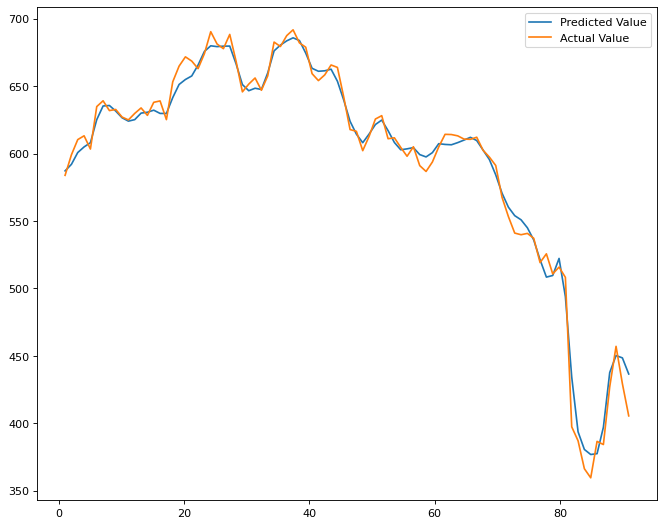

In [20]:
figure(figsize=(10, 8), dpi=80)
x = np.linspace(1, len(final_prediction)+1, len(final_prediction), endpoint=True)
# plot lines
plt.plot(x, final_prediction, label = "Predicted Value")
plt.plot(x, N_testY.tolist(), label = "Actual Value")
plt.legend()
plt.show()